In [1]:
%load_ext autoreload
%autoreload 2

In [9]:
import torch
from torch.utils.data import DataLoader, random_split
from torchvision.transforms import ToTensor, Normalize, Compose, Resize
from dataset import SegmentationDataset
from models import VCN32, VCN16, VCN8
from train import VCNTrainer
import matplotlib.pyplot as plt

# Semantic Segmentation with Fully Convolutional Networks
Semantic Segmentation is a task where you look at every pixel of an image and classify it in one of C categories. It's like coloring images in a coloring book. Green for grass. Blue for sky. Yellow for sun. So on and so forth. Training a neural net for semantic segmentation is a much more fancy way of saying "I'm going to teach an AI to be an expert at coloring within the lines."

To do this task we'll use a fully convolutional network, a neural net that consists only of convolutional layers with ReLU activations and pooling layers mixed in.

## Config

In [3]:
BATCH_SIZE = 32
NUM_CLASSES = 2
DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu")
EPOCHS = 50
WEIGHT_DECAY = 5e-4
LR = 3e-4

## Dataset

In [4]:
torch.manual_seed(5)

In [5]:
transform = Compose([
    ToTensor(),
    Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
    Resize((224, 224), antialias=True)
])

target_transform = Compose([
    Resize((224, 224), antialias=True),
    lambda x: x[0] # first dimension is unnecessary
])

In [6]:
train_val_set = SegmentationDataset(root="data/stage1_train", train=True, transform=transform, target_transform=target_transform)
train_set, val_set = random_split(train_val_set, lengths=[0.8, 0.2]) # 80/20 split
test_set = SegmentationDataset(root="data/stage1_test", train=False)

In [7]:
print(f"train_set size: {len(train_set)}, val_set size: {len(val_set)}, test_set size: {len(test_set)}")

train_set size: 536, val_set size: 134, test_set size: 65


In [8]:
train_loader = DataLoader(train_set, batch_size=BATCH_SIZE, shuffle=True)
val_loader = DataLoader(val_set, batch_size=BATCH_SIZE, shuffle=True)
test_loader = DataLoader(test_set, batch_size=BATCH_SIZE, shuffle=True)

In [9]:
for (X, Y) in train_loader:
    print(X.shape, Y.shape)
    break

torch.Size([32, 3, 224, 224]) torch.Size([32, 224, 224])


## Models
VCN32, VCN16, and VCN8

In [10]:
vcn32 = VCN32(pretrained=True, num_classes=NUM_CLASSES)
vcn16 = VCN16(pretrained=True, num_classes=NUM_CLASSES)
vcn8 = VCN8(pretrained=True, num_classes=NUM_CLASSES)

## Training

In [11]:
torch.cuda.empty_cache()

In [12]:
cross_entropy = torch.nn.CrossEntropyLoss()

In [13]:
vcn32_optimizer = torch.optim.Adam(vcn32.parameters(), lr=LR, weight_decay=WEIGHT_DECAY)
vcn16_optimizer = torch.optim.Adam(vcn16.parameters(), lr=LR, weight_decay=WEIGHT_DECAY)
vcn8_optimizer = torch.optim.Adam(vcn8.parameters(), lr=LR, weight_decay=WEIGHT_DECAY)

In [14]:
vcn32_trainer = VCNTrainer(
    model=vcn32,
    criterion=cross_entropy,
    train_loader=train_loader,
    val_loader=val_loader,
    optimizer=vcn32_optimizer,
    epochs=EPOCHS,
    device=DEVICE,
    checkpoint="vcn32.pth"
)

In [15]:
vcn32_trainer.train()

Epoch [1/50]: Loss: 0.5995777757728801, Val Loss: 0.42112712264060975 Train Pixel Acc: 0.8392379718911819, Val Pixel Acc: 0.8408671625133263


Epoch [2/50]: Loss: 0.3740628116271075, Val Loss: 0.34203568696975706 Train Pixel Acc: 0.8606316586511004, Val Pixel Acc: 0.8625448867746726


Epoch [3/50]: Loss: 0.33103476289440603, Val Loss: 0.3028538584709167 Train Pixel Acc: 0.8608711886398682, Val Pixel Acc: 0.8627214295233019


Epoch [4/50]: Loss: 0.30753371382460876, Val Loss: 0.28608196675777436 Train Pixel Acc: 0.8643570899091912, Val Pixel Acc: 0.8663126689575084


Epoch [5/50]: Loss: 0.29580461452989015, Val Loss: 0.2821623235940933 Train Pixel Acc: 0.8670512259533011, Val Pixel Acc: 0.8696070429104478


Epoch [6/50]: Loss: 0.28561242012416616, Val Loss: 0.30585954785346986 Train Pixel Acc: 0.870118488889259, Val Pixel Acc: 0.872091134728145


Epoch [7/50]: Loss: 0.27711673869806175, Val Loss: 0.3019730031490326 Train Pixel Acc: 0.876183074384138, Val Pixel Acc: 0.8776552802790892


Epoch [8/50]: Loss: 0.27567315452239094, Val Loss: 0.27169098854064944 Train Pixel Acc: 0.8769540545637565, Val Pixel Acc: 0.8791869038893543


Epoch [9/50]: Loss: 0.2711062554050894, Val Loss: 0.2731661289930344 Train Pixel Acc: 0.8772582821899749, Val Pixel Acc: 0.8788547893504417


Epoch [10/50]: Loss: 0.26967381817453046, Val Loss: 0.27016519010066986 Train Pixel Acc: 0.8781650530431389, Val Pixel Acc: 0.8793000875723423


Epoch [11/50]: Loss: 0.26575573928215923, Val Loss: 0.2778165638446808 Train Pixel Acc: 0.879238847912066, Val Pixel Acc: 0.8800492415949589


Epoch [12/50]: Loss: 0.2706006397219265, Val Loss: 0.2663062155246735 Train Pixel Acc: 0.8792520477174078, Val Pixel Acc: 0.879799374857219


Epoch [13/50]: Loss: 0.2646300284301533, Val Loss: 0.2813663691282272 Train Pixel Acc: 0.879962234427353, Val Pixel Acc: 0.8806814936795614


Epoch [14/50]: Loss: 0.2674533304046182, Val Loss: 0.25536806881427765 Train Pixel Acc: 0.879238847912066, Val Pixel Acc: 0.8796881246668443


Epoch [15/50]: Loss: 0.26577599872561064, Val Loss: 0.2859681874513626 Train Pixel Acc: 0.8808748801234579, Val Pixel Acc: 0.881652255701721


Epoch [16/50]: Loss: 0.2631109050091575, Val Loss: 0.26002668738365176 Train Pixel Acc: 0.879592007774425, Val Pixel Acc: 0.8804412944048888


Epoch [17/50]: Loss: 0.2645109094241086, Val Loss: 0.2680013358592987 Train Pixel Acc: 0.8789589004911667, Val Pixel Acc: 0.8798261462934054


Epoch [18/50]: Loss: 0.26662852045367746, Val Loss: 0.27073569893836974 Train Pixel Acc: 0.8739781491537847, Val Pixel Acc: 0.875263252455833


Epoch [19/50]: Loss: 0.2683872598059037, Val Loss: 0.2866215169429779 Train Pixel Acc: 0.8777999575821467, Val Pixel Acc: 0.8788663903061225


Epoch [20/50]: Loss: 0.26673781871795654, Val Loss: 0.27423614263534546 Train Pixel Acc: 0.8778680388316707, Val Pixel Acc: 0.8782290813946847


Epoch [21/50]: Loss: 0.2638251220478731, Val Loss: 0.27217669486999513 Train Pixel Acc: 0.8807657493384481, Val Pixel Acc: 0.8811568354020712


Epoch [22/50]: Loss: 0.26541315545054045, Val Loss: 0.24938730597496034 Train Pixel Acc: 0.8774136680675069, Val Pixel Acc: 0.8789197844482942


Epoch [23/50]: Loss: 0.26532600557102876, Val Loss: 0.26452497243881223 Train Pixel Acc: 0.8808494100765306, Val Pixel Acc: 0.8809605115367042


Epoch [24/50]: Loss: 0.2631630555671804, Val Loss: 0.26022244691848756 Train Pixel Acc: 0.8818932729924992, Val Pixel Acc: 0.8824100360759976


Epoch [25/50]: Loss: 0.2625300857950659, Val Loss: 0.2660740911960602 Train Pixel Acc: 0.8817951854249162, Val Pixel Acc: 0.881765290654508


Epoch [26/50]: Loss: 0.2619923835291582, Val Loss: 0.277007395029068 Train Pixel Acc: 0.881205767638212, Val Pixel Acc: 0.8812544024139507


Epoch [27/50]: Loss: 0.26485076546669006, Val Loss: 0.2747116178274155 Train Pixel Acc: 0.8800342942097548, Val Pixel Acc: 0.8812454786018885


Epoch [28/50]: Loss: 0.26285044673611135, Val Loss: 0.25354662239551545 Train Pixel Acc: 0.8794385553895065, Val Pixel Acc: 0.8797264970587115


Epoch [29/50]: Loss: 0.26470067571191225, Val Loss: 0.2563083529472351 Train Pixel Acc: 0.8804214761056008, Val Pixel Acc: 0.8808141610188852


Epoch [30/50]: Loss: 0.26250526396667256, Val Loss: 0.2720133066177368 Train Pixel Acc: 0.8801871516738692, Val Pixel Acc: 0.880296282458879


Epoch [31/50]: Loss: 0.2607560175306657, Val Loss: 0.28288834989070893 Train Pixel Acc: 0.881825749481229, Val Pixel Acc: 0.8816184939460859


Epoch [32/50]: Loss: 0.26166857077794914, Val Loss: 0.24712921679019928 Train Pixel Acc: 0.8805306812557112, Val Pixel Acc: 0.8804180924935273


Epoch [33/50]: Loss: 0.2648695567074944, Val Loss: 0.2935052514076233 Train Pixel Acc: 0.87863195432674, Val Pixel Acc: 0.8792858094730429


Epoch [34/50]: Loss: 0.26370760623146505, Val Loss: 0.2815384387969971 Train Pixel Acc: 0.8816344824426973, Val Pixel Acc: 0.8819162518085593


Epoch [35/50]: Loss: 0.2613169813857359, Val Loss: 0.2792510181665421 Train Pixel Acc: 0.8814042852740444, Val Pixel Acc: 0.8812444374904813


Epoch [36/50]: Loss: 0.2593217439511243, Val Loss: 0.2710945338010788 Train Pixel Acc: 0.8813743161385357, Val Pixel Acc: 0.8812981290930552


Epoch [37/50]: Loss: 0.257431042544982, Val Loss: 0.26802889406681063 Train Pixel Acc: 0.8825394685334488, Val Pixel Acc: 0.8825587662770332


Epoch [38/50]: Loss: 0.25903430581092834, Val Loss: 0.2517589271068573 Train Pixel Acc: 0.8825468306784001, Val Pixel Acc: 0.8824635789483704


Epoch [39/50]: Loss: 0.25806554538362164, Val Loss: 0.30052870512008667 Train Pixel Acc: 0.8701908089495126, Val Pixel Acc: 0.8719099813432836


Epoch [40/50]: Loss: 0.26294273576315713, Val Loss: 0.27276513278484343 Train Pixel Acc: 0.8799214079871688, Val Pixel Acc: 0.8810256553647579


Epoch [41/50]: Loss: 0.25880877761279836, Val Loss: 0.2539644867181778 Train Pixel Acc: 0.8826363662594235, Val Pixel Acc: 0.882599667082318


Epoch [42/50]: Loss: 0.2586282053414513, Val Loss: 0.2692383795976639 Train Pixel Acc: 0.8808219321718893, Val Pixel Acc: 0.8816663850708194


Epoch [43/50]: Loss: 0.2601051733774297, Val Loss: 0.2537459284067154 Train Pixel Acc: 0.883258988063509, Val Pixel Acc: 0.8831487789845416


Epoch [44/50]: Loss: 0.256457937114379, Val Loss: 0.24946603178977966 Train Pixel Acc: 0.8830497990357523, Val Pixel Acc: 0.8826225715332775


Epoch [45/50]: Loss: 0.2554517449701534, Val Loss: 0.253945979475975 Train Pixel Acc: 0.8836112555446619, Val Pixel Acc: 0.8832472383776272


Epoch [46/50]: Loss: 0.2564266008489272, Val Loss: 0.2652766346931458 Train Pixel Acc: 0.8831690062918824, Val Pixel Acc: 0.882741406963905


Epoch [47/50]: Loss: 0.2621481471201953, Val Loss: 0.26597820222377777 Train Pixel Acc: 0.882880283789122, Val Pixel Acc: 0.8827403658524977


Epoch [48/50]: Loss: 0.2605157380594927, Val Loss: 0.2863243162631989 Train Pixel Acc: 0.8802662017757196, Val Pixel Acc: 0.880300000713905


Epoch [49/50]: Loss: 0.25822900410960703, Val Loss: 0.2509140491485596 Train Pixel Acc: 0.882065576930399, Val Pixel Acc: 0.8822595211125495


Epoch [50/50]: Loss: 0.2575162333600661, Val Loss: 0.27033878266811373 Train Pixel Acc: 0.8809535955823561, Val Pixel Acc: 0.880625571123972


In [5]:
checkpoint = torch.load("vcn32.pth", map_location=DEVICE)

In [24]:
iterations = checkpoint["iterations"]
train_losses = checkpoint["train_losses"]
val_losses = checkpoint["val_losses"]
epochs = checkpoint["epochs"]
train_pix_acc = checkpoint["train_pixel_accuracies"]
val_pix_acc = checkpoint["val_pixel_accuracies"]

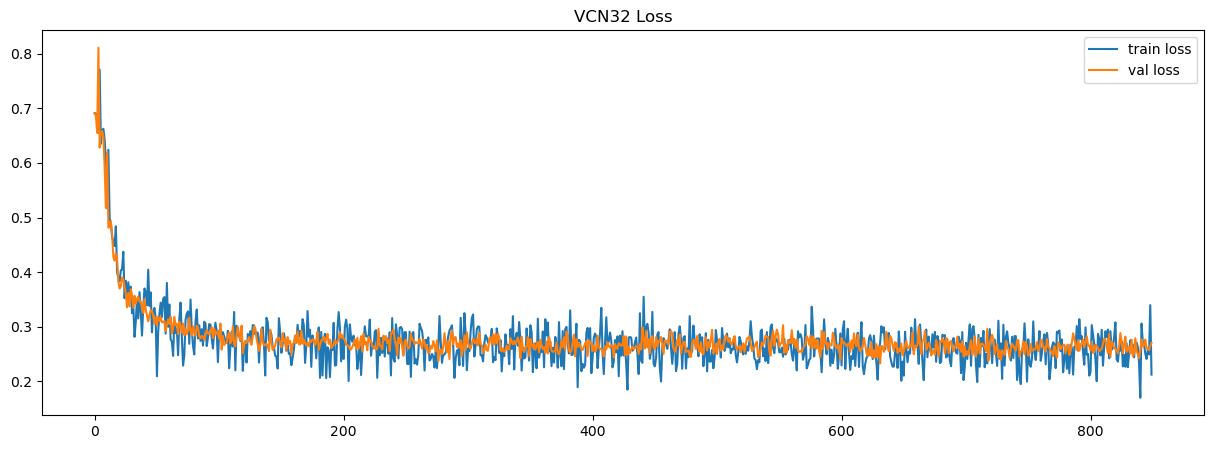

In [25]:
plt.figure(figsize=(15, 5))
plt.title("VCN32 Loss")
plt.plot(range(iterations), train_losses, label="train loss")
plt.plot(range(iterations), val_losses, label="val loss")

plt.legend()

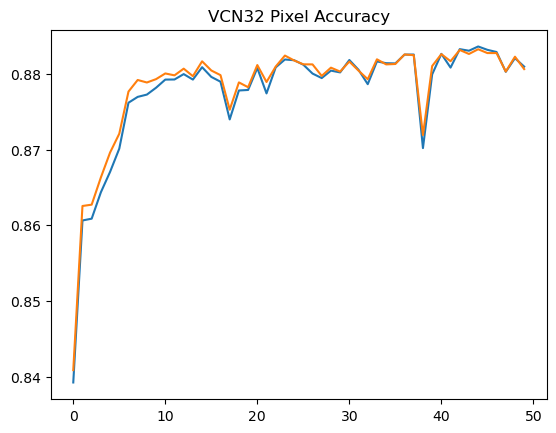

In [27]:
plt.title("VCN32 Pixel Accuracy")
plt.plot(range(epochs), train_pix_acc)
plt.plot(range(epochs), val_pix_acc)